# Matematički softver
## Prvi kolokvij

Ovo je "open book" kolokvij. Dozvoljeno je korištenje bilo kakvih materijala — bilješke s vježbi,
help, tutoriali, postovi na online forumima,... — nastalih _prije_ kolokvija (npr. dozvoljeno je na _StackOverflowu_ naći rješenje nekog zadatka, ali nije dozvoljeno tamo postaviti pitanje kako se rješava neki zadatak).

Također, nije dozvoljena komunikacija (razgovor, _chat_, razmjena bilježaka) među studentima.

Rješenja zadataka pišite u ovu bilježnicu, koju na kraju pošaljite sa Subjectom "MS K1" na veky@math.hr. Rješenje svakog zadatka mora biti samo sebi dovoljno (ponovite `import`e koji vam trebaju), i mora se moći izvršiti bez warninga i grešaka.

Predviđeno vrijeme rješavanja je 90 minuta. Svaki zadatak vrijedi 8 bodova. Maksimalni broj bodova koji se može osvojiti je 40.

### Prvi zadatak

Napišite funkciju `usporedi` koja prima dvije liste, u svakoj od kojih se nalaze samo cijeli brojevi (`int`) i stringovi (`str`). Ako nisu jednake duljine, `usporedi` vraća `False`. Ako jesu, `usporedi` treba ustanoviti jesu li elementi na odgovarajućim pozicijama "slični".

* dva cijela broja su slični ako je jedan od njih (bilo koji) djeljiv onim drugim
* dva stringa su slični ako su jednaki do na veličinu slova (_case insensitive_)
* string i cijeli broj nisu nikada slični

Primjerice, `usporedi([a, b, c], [d, e, f])` treba vratiti `True` ako su `a` i `b` slični, `c` i `d` slični, te `e` i `f` slični.

In [20]:
def usporedi(l1,l2):
    len1 = len(l1)
    if len1!=len(l2):
        return False
    for i in range(len1):
        # if different types
        if type(l1[i]) != type(l2[i]):
            return False
        # if strings
        if isinstance(l1[i],str):
            if l1[i].lower() != l2[i].lower():
                return False
        # if numbers
        elif l1[i]%l2[i]!=0 and l2[i]%l1[i]!=0:
            return False
    return True
    

all([
    usporedi([24, 'v'], [12, 'V']) == True,
    usporedi([1, 2], [1]) == False,
    usporedi([1, 't'], ['t', 1]) == False,
    usporedi(['', 0, 'Wäßrig'], ['', 52, 'WÄSSRIG'])
])

False

### Drugi zadatak

U varijabli `kocke` nalazi se tri milijuna rezultata bacanja igraće kocke.

In [21]:
import numpy as np

In [180]:
kocke = 1 + np.random.randint(0, 6, 3_000_000, dtype=np.int8)
#print(kocke)

######### a) ######### 
cetvorke = kocke.reshape(int(3000000/4),4)
#print(cetvorke)
test6 = np.vectorize(lambda x: x==6)
cetvorke = test6(cetvorke)
dobri = np.any(cetvorke, axis=1)
#print(dobri)
count = np.sum(dobri)
print('Vjerojatnost: {}%'.format(100*float(count/int(3000000/4))))
print('Isplati se.')

######### b) #########
bacanja24_2 = kocke.reshape(int(3000000/(24*2)),24,2)
bacanja24_2 = test6(bacanja24_2)
dobri = np.any(bacanja24_2, axis=2)
dobri = np.any(dobri, axis=1)
count = np.sum(dobri)
print('Vjerojatnost: {}%'.format(100*float(count/int(3000000/(24*2)))))
print('Isplati se.')


Vjerojatnost: 51.83546666666666%
Isplati se.
Vjerojatnost: 99.98559999999999%
Isplati se.


#### a)

Interpretirajte `kocke` kao niz pokusa bacanja po četiri kocke (ne kopirajte podatke, samo im promijenite oblik).

Izračunajte, i izrazite u postotcima na dvije decimale, _a posteriori_ vjerojatnost da se u bacanju četiri kocke pojavi bar jedna šestica. Isplati li se kladiti (1:1) na taj događaj? 

#### b)

Sada reinterpretirajte `kocke` kao niz pokusa, svaki od kojih se sastoji od 24 bacanja 2 kocke (trodimenzionalni tenzor).

Odgovorite na ista pitanja kao u **a)**, za događaj da se u 24 bacanja 2 kocke bar jednom pojavi dvostruka šestica.

### Treći zadatak

U datoteci `bodovi.csv` nalaze se bodovi studenata nekog izmišljenog kolegija. Stupci su redom ime i prezime studenta, bodovi s prvog i drugog kolokvija, te bodovi s tri zadaće.

* Učitajte datoteku u DataFrame.
* Dodajte stupac `Kolokviji` koji predstavlja zbroj bodova na oba kolokvija.
* Dodajte stupac `Zadaće` koji predstavlja ukupan broj bodova na zadaćama. Najslabije napisana zadaća se ne računa.
* Odredite je li bolje (u prosjeku) bio napisan prvi ili drugi kolokvij.
* Ispišite _top 10_ studenata po ukupnim bodovima (kolokviji plus zadaće).

Sve radite u jednom DataFrameu. Smijete dodavati i pomoćne stupce (osim dva gore zadana), ali ih morate obrisati kasnije.

In [164]:
import pandas as pd

df = pd.read_csv('bodovi.csv', delimiter='\t', header=None)
df['Kolokviji'] = df.iloc[:,2]+df.iloc[:,3]
df['Zadaće'] = df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6] - df.iloc[:,[4,5,6]].min(axis=1)
#df
print('Bolji kolokvij:', 'Prvi' if df.iloc[:,2].mean()>df.iloc[:,3].mean() else 'Drugi')

df.sort_values(by=['Kolokviji']+['Zadaće'], ascending=False).head(10)

Bolji kolokvij: Drugi


,0,1,2,3,4,5,6,Kolokviji,Zadaće
410,Eliza,Mora,30,30,0,5,5,60,10
599,Mercedes,Boone,30,30,4,5,5,60,10
50,Lea,Henry,30,30,5,4,4,60,9
204,Makaila,Schaefer,30,30,4,5,2,60,9
250,Madilyn,Martinez,30,30,1,5,4,60,9
450,Ryker,Tate,30,30,4,5,3,60,9
603,Joy,Dorsey,30,30,4,5,2,60,9
794,Jaidyn,Hensley,30,30,5,1,4,60,9
892,Braylon,Sherman,30,30,1,5,4,60,9
909,Hillary,Gentry,30,30,4,2,5,60,9


### Četvrti zadatak

Nacrtajte, jedan pored drugog sa zajedničkom osi ordinata, grafove funkcijâ $f(x)=1/x$ i $g(x)=1/x^2$ na segmentu $[-1,1]$.

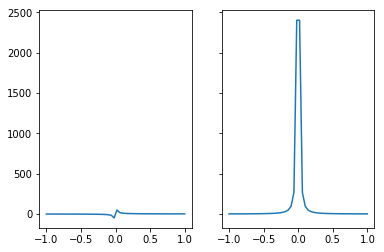

In [140]:
import matplotlib.pyplot as plt
import numpy as np

fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-1, 1)
lijevo.plot(x, 1/x)
desno.plot(x, 1/x**2)


### Peti zadatak

Riješite egzaktno diferencijalnu jednadžbu $x\,y\,'+y=x\sin x$ uz početni uvjet $y\left(\frac\pi2\right)=-\frac12$.

In [160]:
import sympy as sp
from scipy.integrate import ode

sp.init_printing()
y = sp.Function('y')
x = sp.Symbol('x')

jednadzba = sp.Eq(sp.Derivative(y(x),x),sp.sin(x)-y(x)/x)
# za x=0 imamo y=0 što nije rješenje pa radimo s:
sp.pprint(jednadzba)
# i rješimo ju
sp.dsolve(jednadzba, y(x))

d                   y(x)
──(y(x)) = sin(x) - ────
dx                   x  
